importing libraries


In [4]:
import numpy as np
import pandas as pd


Importing dataset


In [5]:
df =pd.read_csv("weatherAUS.csv")
X = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values
Y = df.iloc[:,-1].values

In [6]:
print(X)

[['Albury' 13.4 22.9 ... 21.8 'No' 0.0]
 ['Albury' 7.4 25.1 ... 24.3 'No' 0.0]
 ['Albury' 12.9 25.7 ... 23.2 'No' 0.0]
 ...
 ['Uluru' 3.6 25.3 ... 24.5 'No' 0.0]
 ['Uluru' 5.4 26.9 ... 26.1 'No' 0.0]
 ['Uluru' 7.8 27.0 ... 26.0 'No' 0.0]]


In [7]:
print(Y)

['No' 'No' 'No' ... 'No' 'No' 'No']


Data exploration


In [8]:
df.shape

(142193, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Text(0.5, 1.0, 'type of our data ')

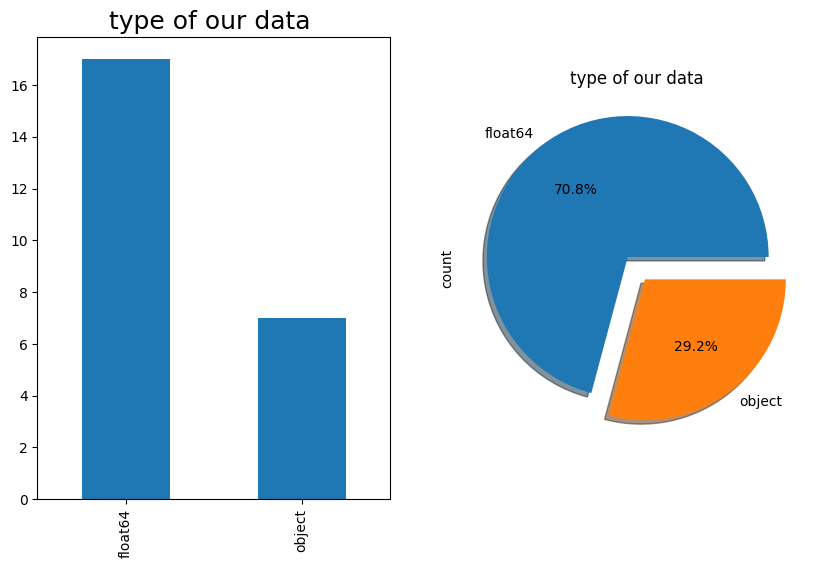

In [14]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(1, 2, figsize=(10, 6))


df.dtypes.value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, ax=axarr[1])
axarr[1].set_title("Type of our data", fontsize=18)


df.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('type of our data');
axarr[0].set_title("type of our data ", fontsize=18)

In [15]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

<ipython-input-15-09148030d9c7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
<ipython-input-15-09148030d9c7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
<ipython-input-15-

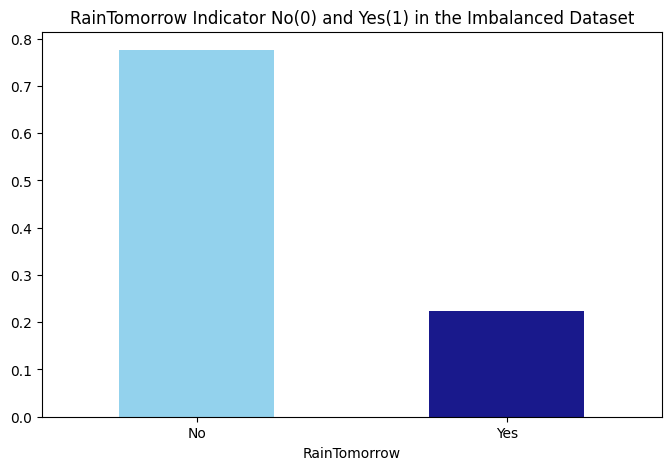

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
full_data = pd.read_csv('weatherAUS.csv', usecols=[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,23])
#full_data = pd.read_csv('weatherAUS.csv')
full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

In [22]:
# # create a table with data missing
# missing_values=df.isnull().sum() # missing values

# percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

# value = {
#     'missing_values ':missing_values,
#     'percent_missing %':percent_missing ,
#      'data type' : df.dtypes
# }
# frame=pd.DataFrame(value)
# frame

# List of columns you want to include
selected_columns = ['Location', 'MinTemp', 'MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RISK_MM','RainTomorrow']  # Replace with your desired column names

# Filter the dataframe to include only the selected columns
df_selected = df[selected_columns]

# Calculate missing values and percentage for selected columns
missing_values = df_selected.isnull().sum()
percent_missing = df_selected.isnull().sum() / df_selected.shape[0] * 100

# Create the summary table
value = {
    'missing_values': missing_values,
    'percent_missing %': percent_missing,
    'data type': df_selected.dtypes
}

# Create a DataFrame from the summary
frame = pd.DataFrame(value)
frame


,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,637,0.447983,float64
MaxTemp,322,0.226453,float64
Rainfall,1406,0.988797,float64
WindGustDir,9330,6.561504,object
WindGustSpeed,9270,6.519308,float64
WindDir9am,10013,7.041838,object
WindDir3pm,3778,2.656952,object
WindSpeed9am,1348,0.948007,float64
WindSpeed3pm,2630,1.849599,float64
